<a href="https://colab.research.google.com/github/hsy19y/-/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_8%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
##데이터셋 로드
mnist = tf.keras.datasets.mnist

In [6]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


##4-1 가중치 초기화

1. he_uniform : 활성화 함수가 ReLU 인 경우 사용
2. glorot_uniform : 활성화 함수가 Sigmoid, Tahn 인 경우 사용

In [7]:
##kernel_initializer = 'uniform'
dense = tf.keras.layers.Dense(256, kernel_initializer = 'uniform', activation = 'relu')

In [8]:
##kernel_initializer = 'normal'
dense = tf.keras.layers.Dense(256, kernel_initializer = 'normal', activation = 'relu')

In [9]:
##kernel_initializer = 'he_normal'
dense = tf.keras.layers.Dense(256, kernel_initializer = 'he_normal', activation = 'relu')

In [10]:
##가중치를 적용하지 않은 경우
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(64, activation = 'relu'),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(10, activation = 'softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6440 - accuracy: 0.6202 - val_loss: 0.7093 - val_accuracy: 0.8135
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5688 - accuracy: 0.8543 - val_loss: 0.4185 - val_accuracy: 0.9044
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3400 - accuracy: 0.9147 - val_loss: 0.3044 - val_accuracy: 0.9276
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2336 - accuracy: 0.9382 - val_loss: 0.2334 - val_accuracy: 0.9379
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1840 - accuracy: 0.9509 - val_loss: 0.1870 - val_accuracy: 0.9513
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1591 - accuracy: 0.9582 - val_loss: 0.1607 - val_accuracy: 0.9583
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1421 - accuracy: 0.9611 - val_loss: 0.1570 - val_accuracy:

In [12]:
####kernel_initializer = 'he_normal' 을 적용한 경우
model_w_he = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                                  tf.keras.layers.Dense(64, kernel_initializer = 'he_normal', activation = 'relu'),
                                  tf.keras.layers.Dense(32, activation = 'relu'),
                                  tf.keras.layers.Dense(10, activation = 'softmax')])
model_w_he.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_w_he.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history_w_he = model_w_he.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3956 - accuracy: 0.7574 - val_loss: 0.4855 - val_accuracy: 0.8696
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4145 - accuracy: 0.8864 - val_loss: 0.3504 - val_accuracy: 0.9047
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2776 - accuracy: 0.9226 - val_loss: 0.2702 - val_accuracy: 0.9317
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1966 - accuracy: 0.9460 - val_loss: 0.1785 - val_accuracy: 0.9530
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1668 - accuracy: 0.9541 - val_loss: 0.1846 - val_accuracy: 0.9478
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1465 - accuracy: 0.9597 - val_loss: 0.1702 - val_accuracy: 0.9597
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1325 - accuracy: 0.9629 - val_loss: 0.1646 - val_accuracy:

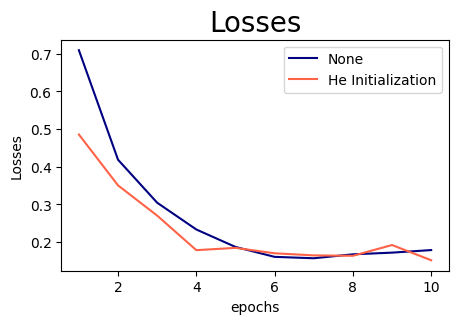

In [14]:
##두 모델 비교 시각화
plt.figure(figsize = (5,3))
plt.plot(np.arange(1,11),history.history['val_loss'], color = 'navy', label = 'None')
plt.plot(np.arange(1,11),history_w_he.history['val_loss'], color = 'tomato', label = 'He Initialization')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show()

In [15]:
####kernel_initializer = 'glorot_normal' 을 적용한 경우
model_w_gl = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                                  tf.keras.layers.Dense(64, kernel_initializer = 'glorot_normal', activation = 'sigmoid'),
                                  tf.keras.layers.Dense(32, activation = 'sigmoid'),
                                  tf.keras.layers.Dense(10, activation = 'softmax')])
model_w_gl.summary()  

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_w_gl.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history_w_gl = model_w_gl.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7794 - accuracy: 0.8087 - val_loss: 0.4083 - val_accuracy: 0.8848
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4026 - accuracy: 0.8817 - val_loss: 0.3568 - val_accuracy: 0.8907
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3631 - accuracy: 0.8903 - val_loss: 0.3597 - val_accuracy: 0.8921
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3411 - accuracy: 0.8960 - val_loss: 0.3369 - val_accuracy: 0.8985
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3332 - accuracy: 0.8996 - val_loss: 0.3179 - val_accuracy: 0.9031
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3047 - accuracy: 0.9070 - val_loss: 0.2809 - val_accuracy: 0.9144
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2962 - accuracy: 0.9093 - val_loss: 0.2732 - val_accuracy:

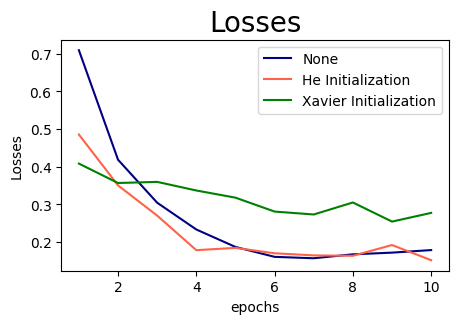

In [17]:
##세 모델 시각화
plt.figure(figsize = (5,3))
plt.plot(np.arange(1,11),history.history['val_loss'], color = 'navy', label = 'None')
plt.plot(np.arange(1,11),history_w_he.history['val_loss'], color = 'tomato', label = 'He Initialization')
plt.plot(np.arange(1,11),history_w_gl.history['val_loss'], color = 'green', label = 'Xavier Initialization')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show()

##4-2 규제(Regularization)

1. L1 : 가중치의 절대값에 비례하여 (0.001을 곱하여) 비용 추가
2. L2 : 가중치의 제곱에 비례하여 (0.001을 곱하여) 비용 추가

In [31]:
regularizer2 = tf.keras.regularizers.l2(0.001)
L2_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(64, kernel_initializer ='normal', kernel_regularizer = regularizer2, activation = 'relu'),
    tf.keras.layers.Dense(32, kernel_initializer ='normal', kernel_regularizer = regularizer2, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

In [32]:
L2_model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
L2_model = L2_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7241 - accuracy: 0.8454 - val_loss: 0.3401 - val_accuracy: 0.9281
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3074 - accuracy: 0.9331 - val_loss: 0.2967 - val_accuracy: 0.9404
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2513 - accuracy: 0.9478 - val_loss: 0.2395 - val_accuracy: 0.9505
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2200 - accuracy: 0.9559 - val_loss: 0.2121 - val_accuracy: 0.9557
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2045 - accuracy: 0.9586 - val_loss: 0.2171 - val_accuracy: 0.9576
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1966 - accuracy: 0.9613 - val_loss: 0.1976 - val_accuracy: 0.9608
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1863 - accuracy: 0.9646 - val_loss: 0.2096 - val_accurac

In [33]:
##L1 규제
regularizer1 = tf.keras.regularizers.l1(0.001)
L1_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(64, kernel_initializer ='normal', kernel_regularizer = regularizer1, activation = 'relu'),
    tf.keras.layers.Dense(32, kernel_initializer ='normal', kernel_regularizer = regularizer1, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

In [34]:
L1_model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
L1_model = L1_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 1.5381 - accuracy: 0.8665 - val_loss: 0.8779 - val_accuracy: 0.9254
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6826 - accuracy: 0.9352 - val_loss: 0.5302 - val_accuracy: 0.9447
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4838 - accuracy: 0.9434 - val_loss: 0.4567 - val_accuracy: 0.9397
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4400 - accuracy: 0.9470 - val_loss: 0.4007 - val_accuracy: 0.9545
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4165 - accuracy: 0.9495 - val_loss: 0.4301 - val_accuracy: 0.9478
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4060 - accuracy: 0.9499 - val_loss: 0.4040 - val_accuracy: 0.9511
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4016 - accuracy: 0.9510 - val_loss: 0.3840 - val_accuracy

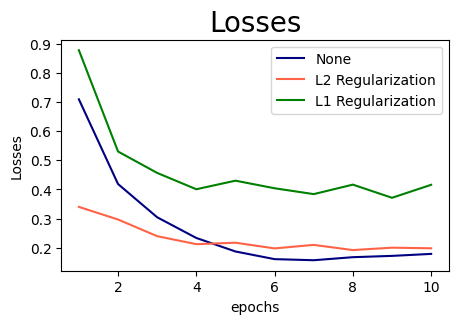

In [35]:
##L2규제 모델비교 시각화
plt.figure(figsize = (5,3))
plt.plot(np.arange(1,11),history.history['val_loss'], color = 'navy', label = 'None')
plt.plot(np.arange(1,11), L2_model.history['val_loss'], color = 'tomato', label = 'L2 Regularization')
plt.plot(np.arange(1,11), L1_model.history['val_loss'], color = 'green', label = 'L1 Regularization')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show()

# 4-3 드롭아웃
1. 비율로 로드수를 줄이는 규제 방법


In [36]:
##L1(0.01)+ Dropout
regularizer1 = tf.keras.regularizers.l1(0.001)
droup_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(64, kernel_initializer ='normal', kernel_regularizer = regularizer1, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, kernel_initializer ='normal', kernel_regularizer = regularizer1, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])
droup_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_29 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trai

In [37]:
droup_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])
droup_model = droup_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 3.6550 - accuracy: 0.1540 - val_loss: 2.7049 - val_accuracy: 0.2224
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4315 - accuracy: 0.2733 - val_loss: 1.5910 - val_accuracy: 0.6355
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6752 - accuracy: 0.5450 - val_loss: 0.9760 - val_accuracy: 0.8327
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3870 - accuracy: 0.6590 - val_loss: 0.8174 - val_accuracy: 0.8904
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.2962 - accuracy: 0.6930 - val_loss: 0.8267 - val_accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2224 - accuracy: 0.7313 - val_loss: 0.7272 - val_accuracy: 0.9019
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.1691 - accuracy: 0.7491 - val_loss: 0.7477 - val_accuracy

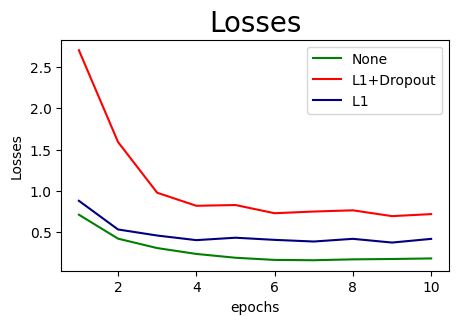

In [44]:
plt.figure(figsize = (5,3))
plt.plot(np.arange(1,11), history.history['val_loss'], color = 'green', label = 'None')
plt.plot(np.arange(1,11), droup_model.history['val_loss'], color = 'red', label = 'L1+Dropout')
plt.plot(np.arange(1,11), L1_model.history['val_loss'], color = 'navy', label = 'L1 ')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show()

# 4-4 배치 정규화(Batch Nomalization)
1. 각 층에서 스케일을 조정

In [50]:
batch_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

In [52]:
batch_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])
batch_model = batch_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3119 - accuracy: 0.9096 - val_loss: 0.1465 - val_accuracy: 0.9549
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1470 - accuracy: 0.9554 - val_loss: 0.1318 - val_accuracy: 0.9618
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1156 - accuracy: 0.9646 - val_loss: 0.1019 - val_accuracy: 0.9711
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1004 - accuracy: 0.9684 - val_loss: 0.0952 - val_accuracy: 0.9699
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0864 - accuracy: 0.9725 - val_loss: 0.0833 - val_accuracy: 0.9729
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0773 - accuracy: 0.9757 - val_loss: 0.0832 - val_accuracy: 0.9731
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0715 - accuracy: 0.9771 - val_loss: 0.0875 - val_accura

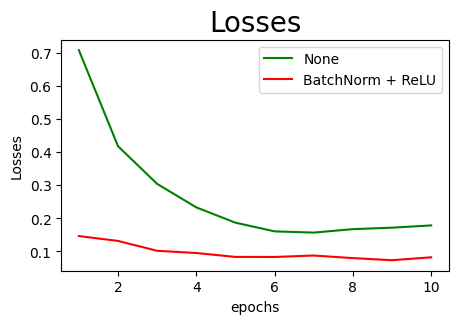

In [56]:
plt.figure(figsize = (5,3))
plt.plot(np.arange(1,11), history.history['val_loss'], color = 'green', label = 'None')
plt.plot(np.arange(1,11), batch_model.history['val_loss'], color = 'red', label = 'BatchNorm + ReLU')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show()

# 4-5 활성화 함수
1. ReLU
2. LeakyReLU

In [62]:
##Batch Nomalization + LeakyReLU
Leaky_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha = 0.5),
    tf.keras.layers.Dense(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha = 0.5),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

In [63]:
Leaky_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])
Leaky_model = Leaky_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3571 - accuracy: 0.8990 - val_loss: 0.2035 - val_accuracy: 0.9393
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2114 - accuracy: 0.9373 - val_loss: 0.1558 - val_accuracy: 0.9529
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1759 - accuracy: 0.9474 - val_loss: 0.1428 - val_accuracy: 0.9560
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1561 - accuracy: 0.9514 - val_loss: 0.1402 - val_accuracy: 0.9571
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1382 - accuracy: 0.9573 - val_loss: 0.1283 - val_accuracy: 0.9614
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1297 - accuracy: 0.9589 - val_loss: 0.1100 - val_accuracy: 0.9658
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1186 - accuracy: 0.9635 - val_loss: 0.1098 - val_accuracy:

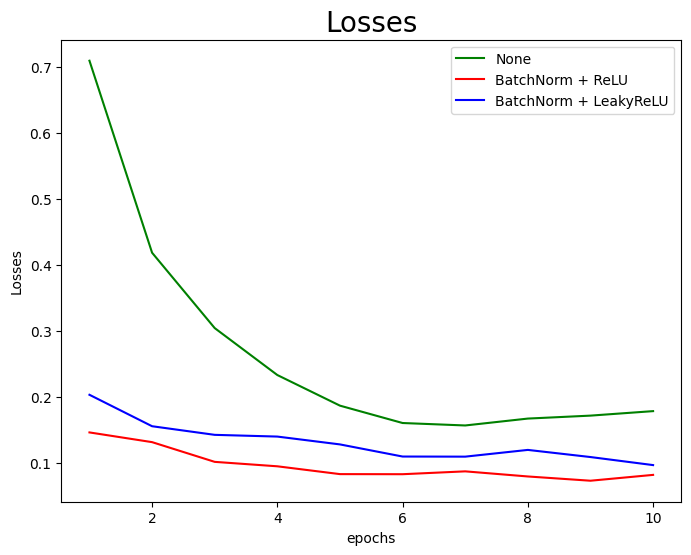

In [64]:
plt.figure(figsize = (8,6))
plt.plot(np.arange(1,11), history.history['val_loss'], color = 'green', label = 'None')
plt.plot(np.arange(1,11), batch_model.history['val_loss'], color = 'red', label = 'BatchNorm + ReLU')
plt.plot(np.arange(1,11), Leaky_model.history['val_loss'], color = 'blue', label = 'BatchNorm + LeakyReLU')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show()